**step 2**

In [1]:
import pandas as pd

data = pd.read_csv('data.xlsx - Sheet1.csv')

print("First 5 rows of the data:")
print(data.head())

print(f"\nShape of the dataset: {data.shape}")

print("\nSummary statistics of the dataset:")
print(data.describe())


First 5 rows of the data:
  Unnamed: 0      ID     Salary          DOJ          DOL  \
0      train  203097   420000.0  6/1/12 0:00      present   
1      train  579905   500000.0  9/1/13 0:00      present   
2      train  810601   325000.0  6/1/14 0:00      present   
3      train  267447  1100000.0  7/1/11 0:00      present   
4      train  343523   200000.0  3/1/14 0:00  3/1/15 0:00   

                Designation    JobCity Gender           DOB  10percentage  \
0   senior quality engineer  Bangalore      f  2/19/90 0:00          84.3   
1         assistant manager     Indore      m  10/4/89 0:00          85.4   
2          systems engineer    Chennai      f   8/3/92 0:00          85.0   
3  senior software engineer    Gurgaon      m  12/5/89 0:00          85.6   
4                       get    Manesar      m  2/27/91 0:00          78.0   

   ... ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0  ...              -1              -1              -1         

**Step 3**

<ipython-input-2-329512964937>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions =

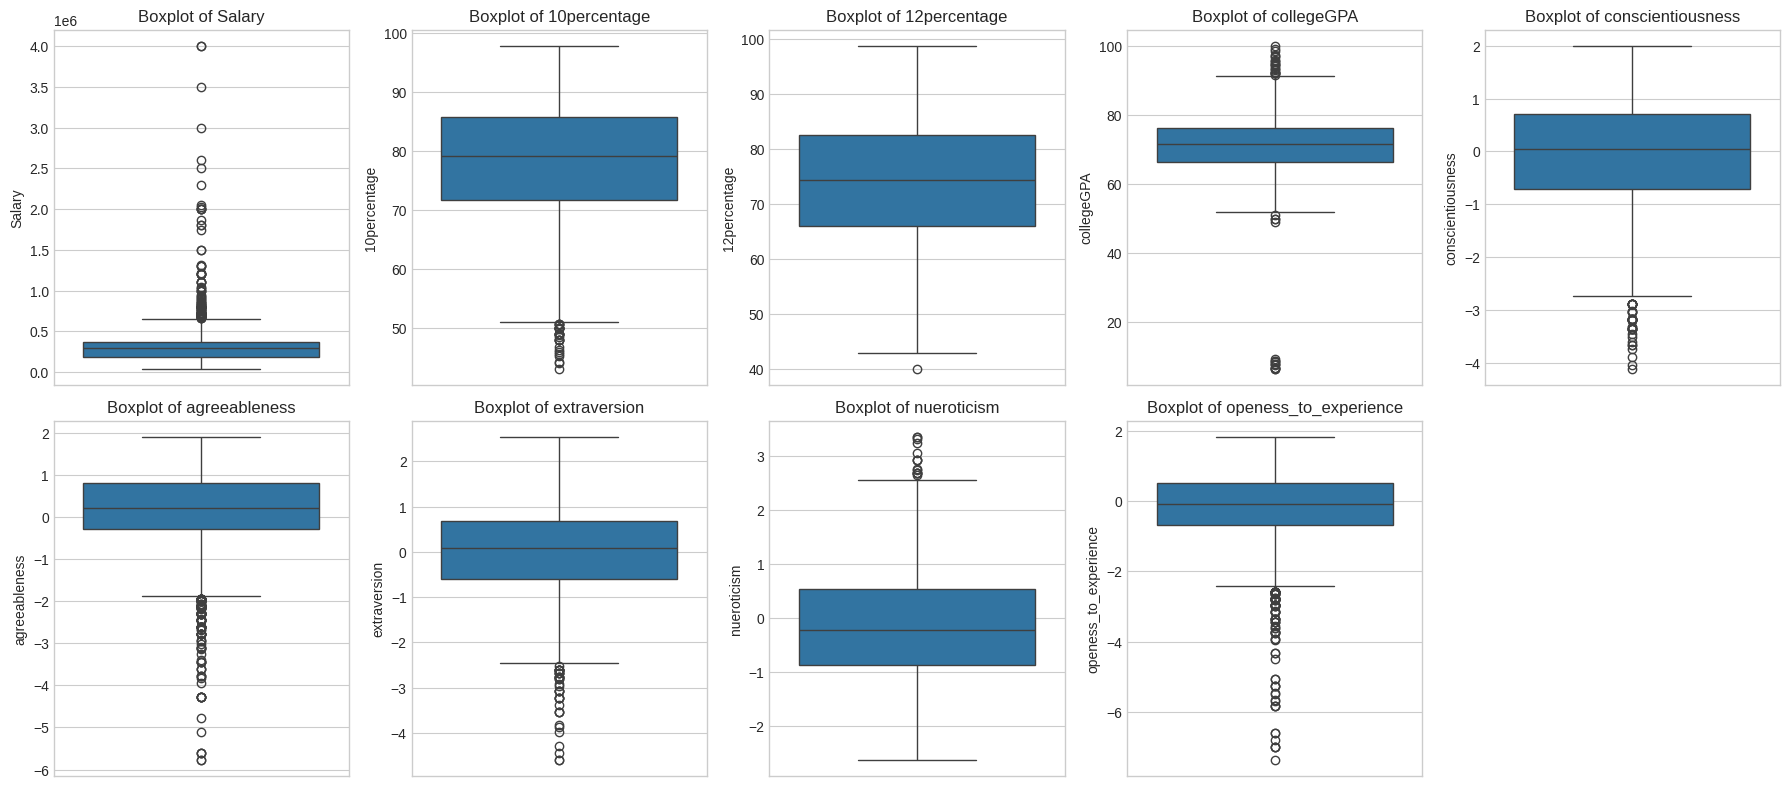

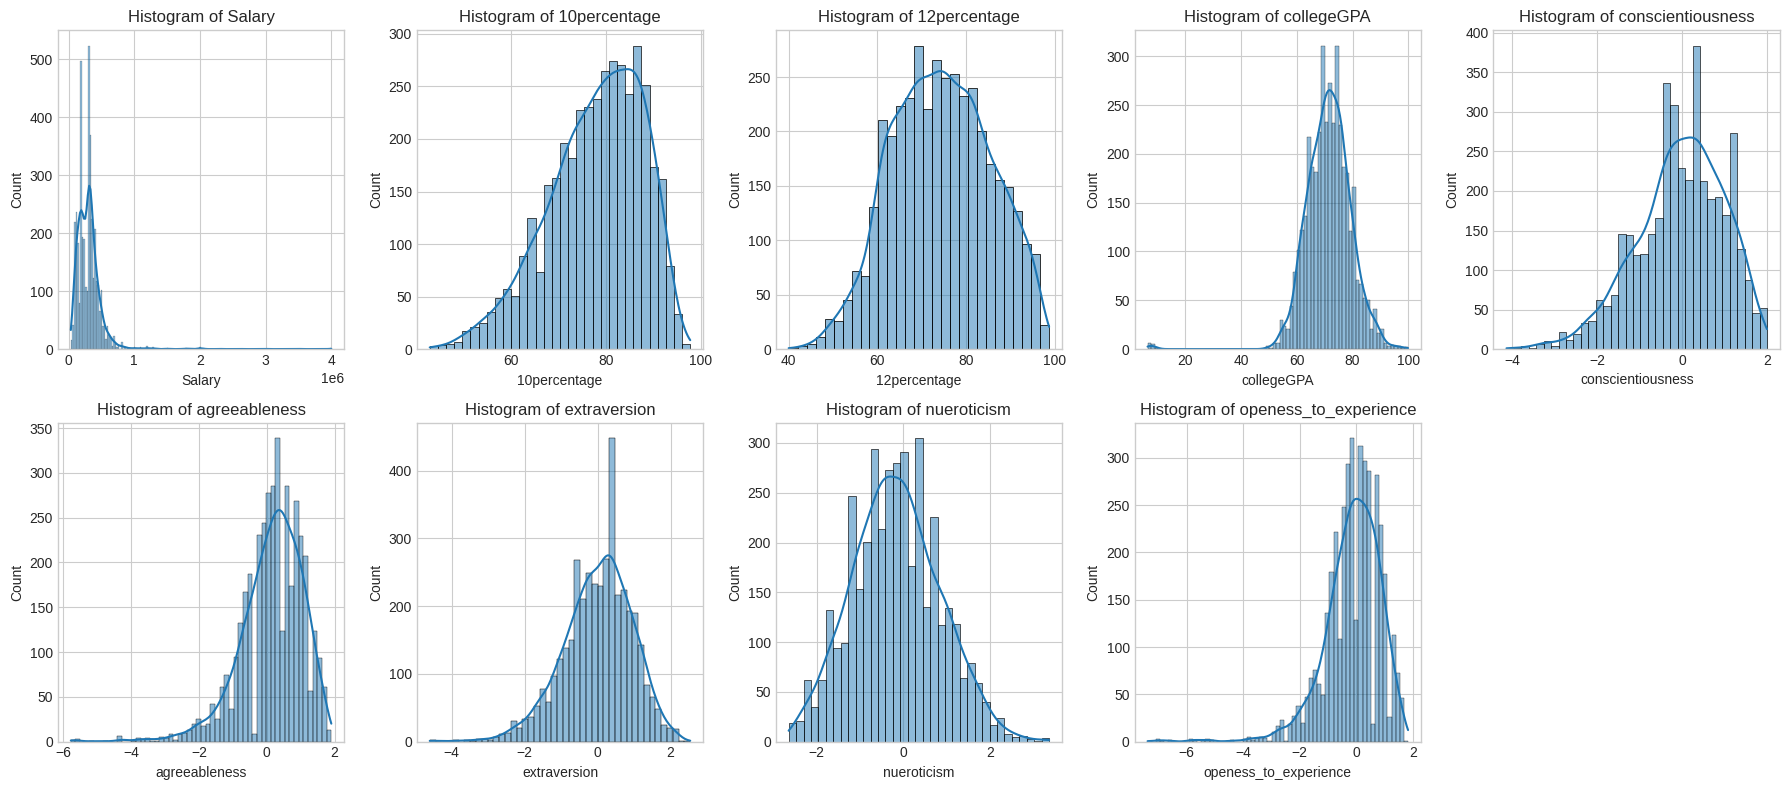

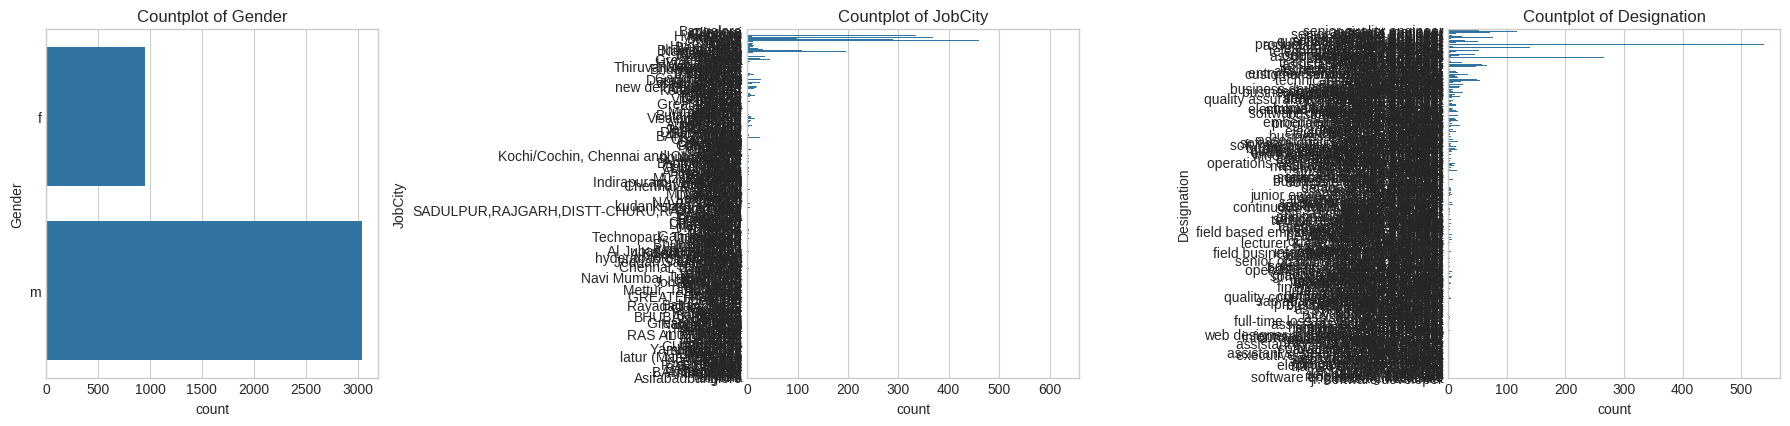

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')

numerical_columns = ['Salary', '10percentage', '12percentage', 'collegeGPA',
                     'conscientiousness', 'agreeableness', 'extraversion',
                     'nueroticism', 'openess_to_experience']

categorical_columns = ['Gender', 'JobCity', 'Designation']

plt.figure(figsize=(18, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 5, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data[col])
    plt.title(f'Countplot of {col}')
plt.tight_layout()
plt.show()


**Step 4**

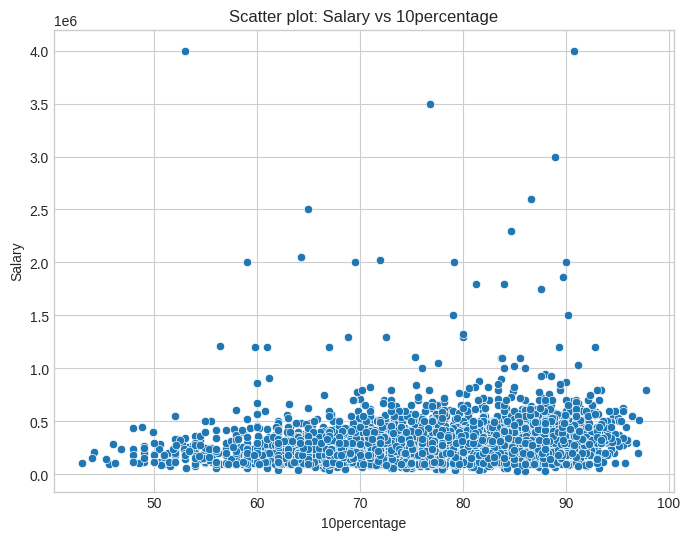

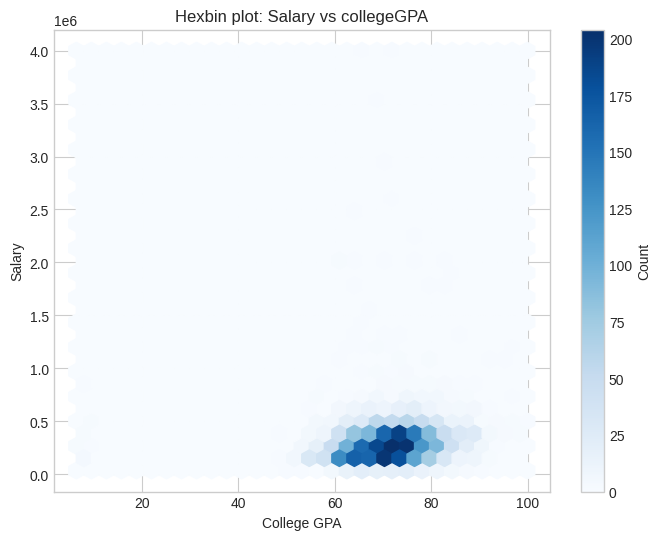

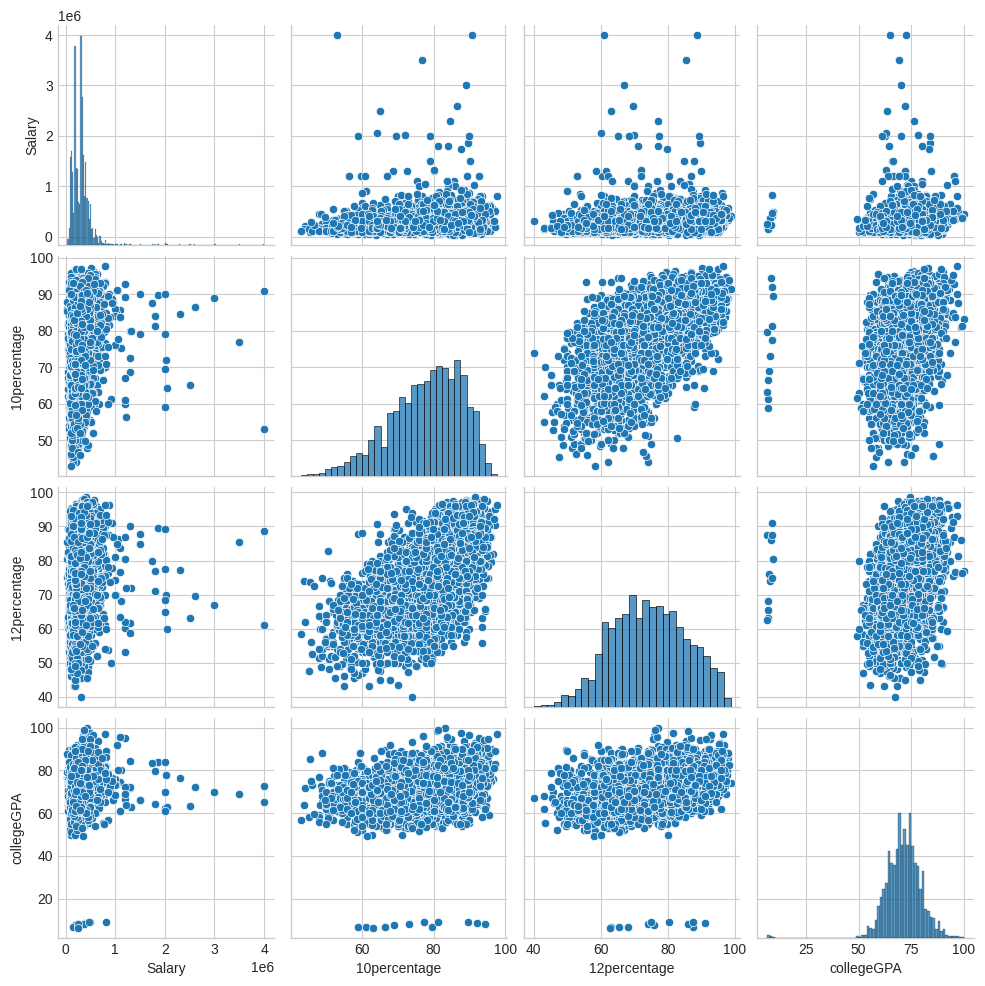

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 88.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 94.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-

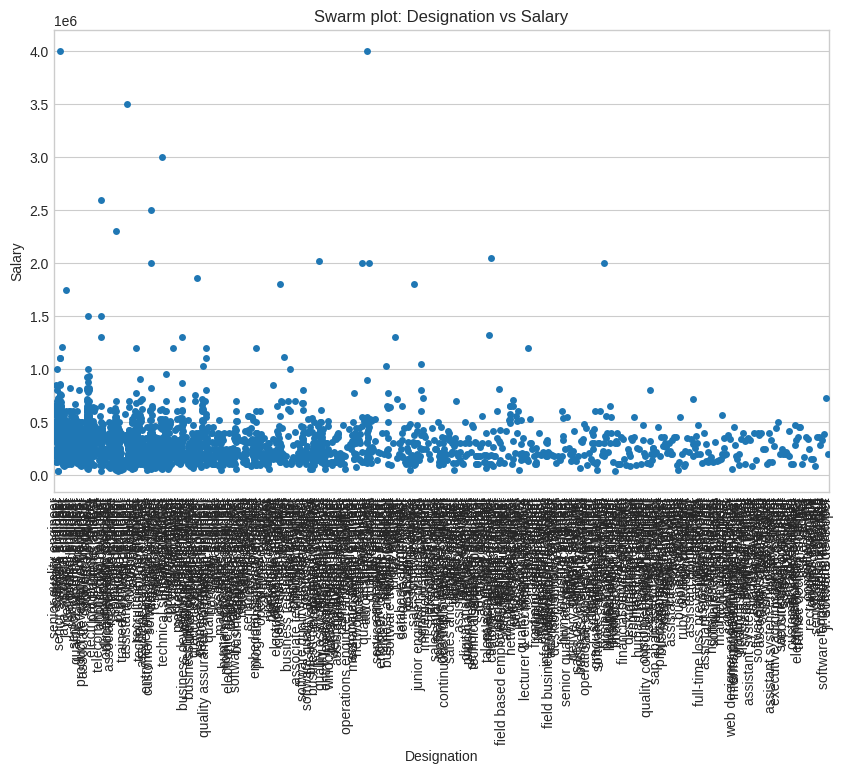

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


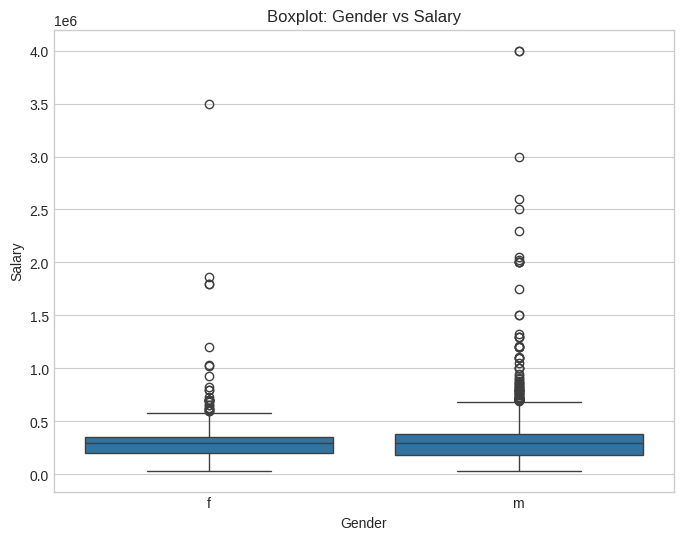

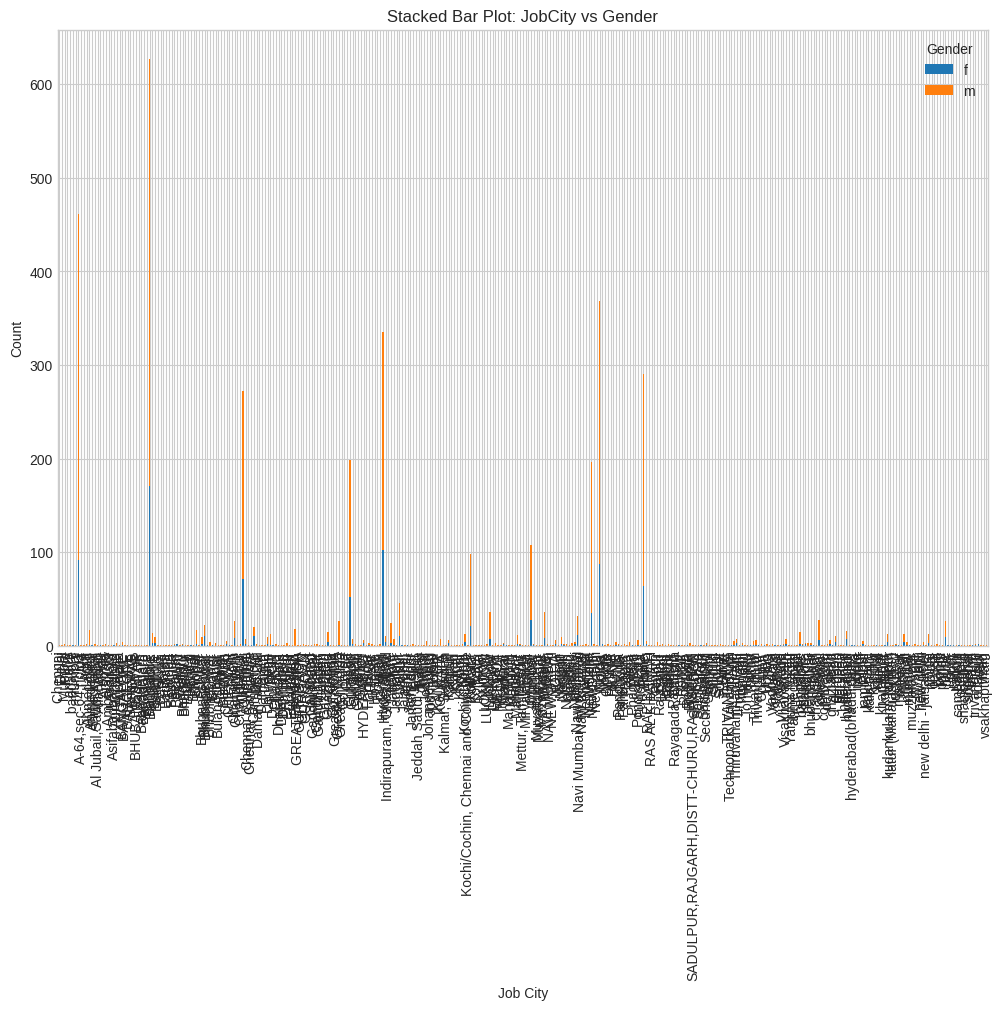

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x='10percentage', y='Salary', data=data)
plt.title('Scatter plot: Salary vs 10percentage')
plt.show()

plt.figure(figsize=(8, 6))
plt.hexbin(data['collegeGPA'], data['Salary'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Hexbin plot: Salary vs collegeGPA')
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.show()

sns.pairplot(data[['Salary', '10percentage', '12percentage', 'collegeGPA']])
plt.show()

plt.figure(figsize=(10, 6))
sns.swarmplot(x='Designation', y='Salary', data=data)
plt.xticks(rotation=90)
plt.title('Swarm plot: Designation vs Salary')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Salary', data=data)
plt.title('Boxplot: Gender vs Salary')
plt.show()

jobcity_gender = pd.crosstab(data['JobCity'], data['Gender'])

jobcity_gender.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Stacked Bar Plot: JobCity vs Gender')
plt.xlabel('Job City')
plt.ylabel('Count')
plt.show()


**Step 5**

In [8]:
fresh_grads = data[
    (data['Designation'].isin(['Programming Analyst', 'Software Engineer', 'Hardware Engineer', 'Associate Engineer'])) &
    (data['ComputerScience'] == 1)
]

mean_salary = fresh_grads['Salary'].mean()
median_salary = fresh_grads['Salary'].median()

print(f'Mean Salary of fresh graduates: {mean_salary}')
print(f'Median Salary of fresh graduates: {median_salary}')

if 250000 <= mean_salary <= 300000:
    print("The salary claim of 2.5-3 lakhs is correct based on the mean salary.")
else:
    print("The salary claim of 2.5-3 lakhs is not supported by the data.")


Mean Salary of fresh graduates: nan
Median Salary of fresh graduates: nan
The salary claim of 2.5-3 lakhs is not supported by the data.


Chi-Square Statistic: 12.620977117911053, p-value: 0.8573966356381522
There is no significant relationship between Gender and Specialization.


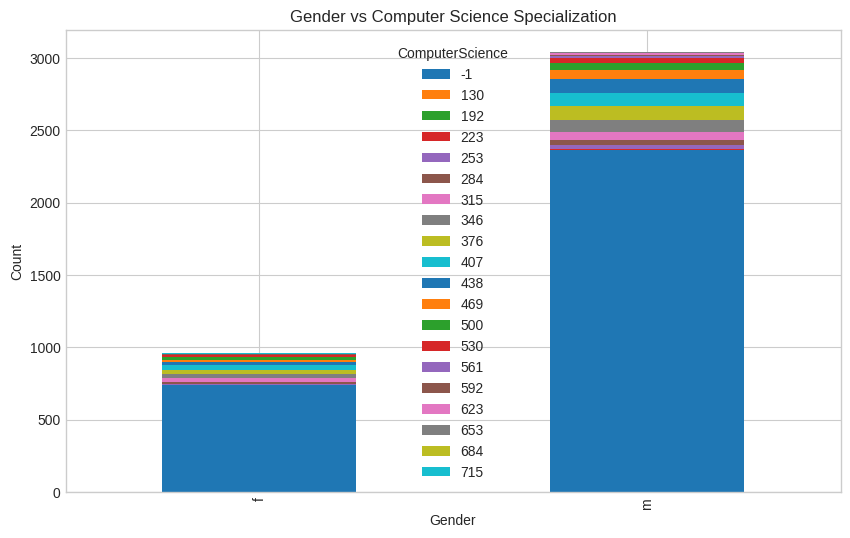

In [5]:
import scipy.stats as stats
from pandas import crosstab

gender_specialization = pd.crosstab(data['Gender'], data['ComputerScience'])

chi2, p, dof, expected = stats.chi2_contingency(gender_specialization)

print(f"Chi-Square Statistic: {chi2}, p-value: {p}")
if p < 0.05:
    print("There is a significant relationship between Gender and Specialization.")
else:
    print("There is no significant relationship between Gender and Specialization.")

gender_specialization.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender vs Computer Science Specialization')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
